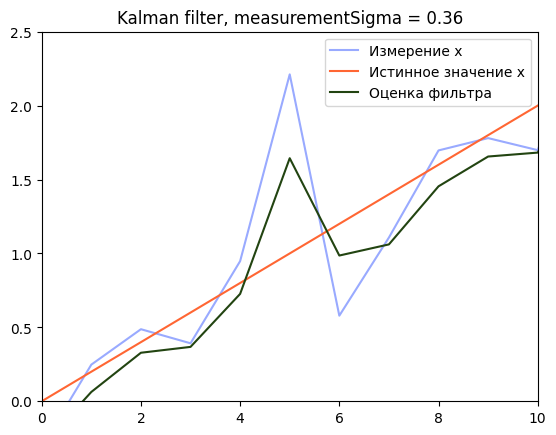

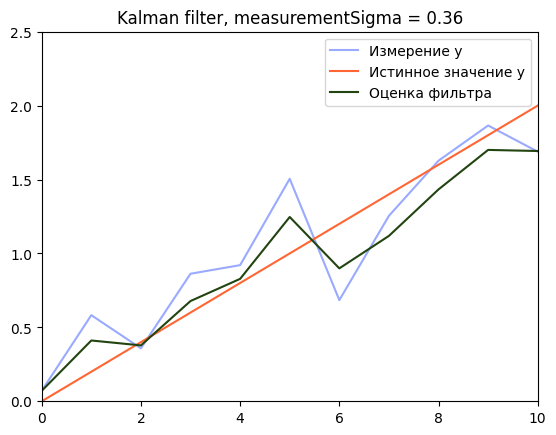

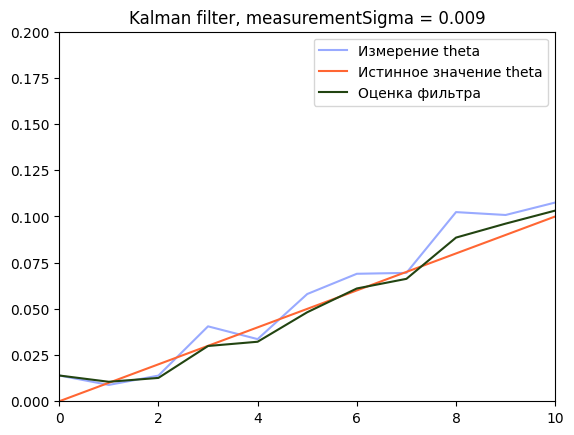

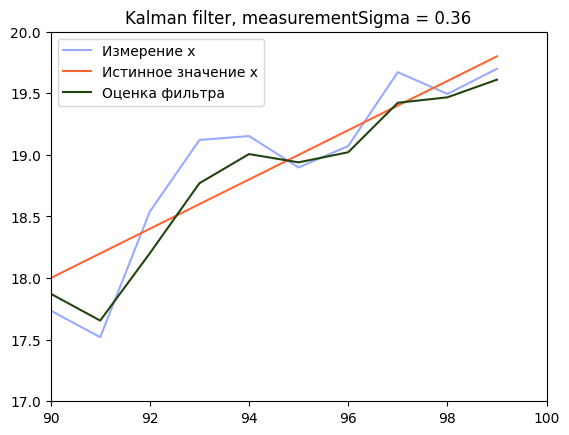

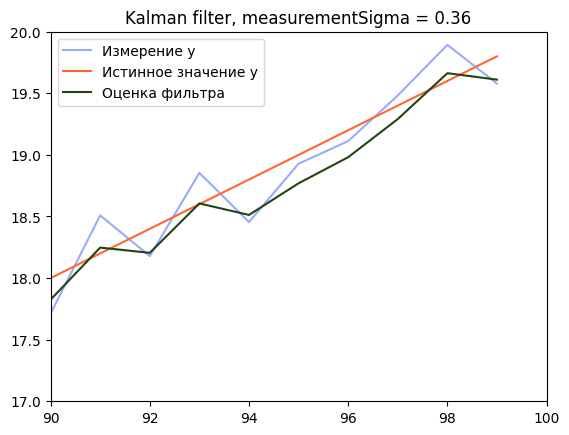

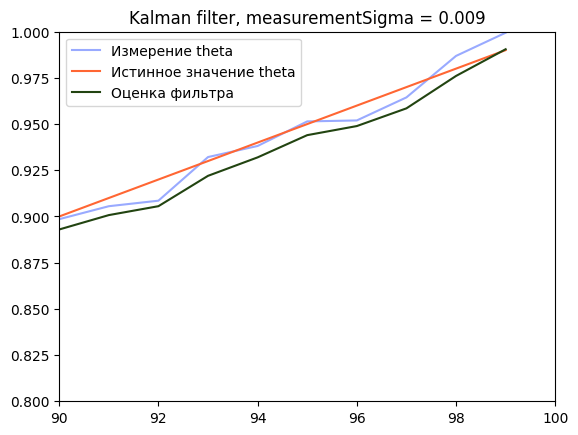

In [7]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from filterpy import kalman
import filterpy.common

dt = 0.01
measurementSigma_xy = 0.36  # Среднеквадратичное отклонение датчика измерений x и y (считали, что почти все укладывается в 3 сигма)
measurementSigma_tetta = 0.009 # Среднеквадратичное отклонение датчика измерений тета
samples_count = 100  # Количество точек траектории 
u = np.array([20, 20, 1])  # Вектор управления (скорости по x и y и угловая скорость)


# Моделирование данных датчика
def simulate_sensor(samples_count, dt, u, measurementSigma_xy, measurementSigma_tetta):
    trajectory = np.zeros((samples_count, 3))
    measurement = np.zeros((samples_count, 3))
    
    for i in range(0, samples_count):
        noise_xy = np.random.normal(0.0, measurementSigma_xy, size=2)
        noise_tetta = np.random.normal(0.0, measurementSigma_tetta)
        noise = np.hstack((noise_xy, noise_tetta))
        measurement[i] = trajectory[i] + noise
        if i < samples_count - 1:
            trajectory[i + 1] = trajectory[i] + u * dt
        
    trajectory = np.array(trajectory)
    measurement = np.array(measurement)
    return trajectory, measurement

trajectory, obs = simulate_sensor(samples_count, dt, u, measurementSigma_xy, measurementSigma_tetta)

true_x, true_y, true_theta = trajectory.T
obs_x, obs_y, obs_theta = obs.T

# Создаём объект KalmanFilter
filter = kalman.KalmanFilter(dim_x=3,      # Размер вектора стостояния
                                     dim_z=3)      # Размер вектора измерений

filter.F = np.eye(3)

filter.H = np.eye(3)

# Ковариационная матрица ошибки модели
filter.Q = np.diag([measurementSigma_xy ** 2, measurementSigma_xy ** 2, measurementSigma_tetta ** 2]) 

# Ковариационная матрица ошибки измерения - 3х3
filter.R = np.diag([measurementSigma_xy ** 2, measurementSigma_xy ** 2, measurementSigma_tetta ** 2])

# Начальное состояние.
filter.x = np.array([0.0, 0.0, 0.0])

# Ковариационная матрица для начального состояния (max знач x и y - 10 м, тета - 2pi)
filter.P = np.diag([11.11, 11.11, 11.11])

# Управление
filter.B = np.diag([dt, dt, dt])

filteredState = []

# Обработка данных
for i in range(samples_count):
    z = [obs[i][0], obs[i][1], obs[i][2]]      # Вектор измерений
    filter.predict()                            # Этап предсказания
    filter.update(z)
    
    filteredState.append(filter.x.copy())


filteredState = np.array(filteredState)

# Визуализация для первых 10 измерений
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_xy}")
plt.plot(obs_x, label="Измерение x", color="#99AAFF")
plt.plot(true_x, label="Истинное значение x", color="#FF6633")
plt.plot(filteredState[:, 0], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 2.5)
plt.show()
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_xy}")
plt.plot(obs_y, label="Измерение y", color="#99AAFF")
plt.plot(true_y, label="Истинное значение y", color="#FF6633")
plt.plot(filteredState[:, 1], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 2.5)
plt.show()
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_tetta}")
plt.plot(obs_theta, label="Измерение theta", color="#99AAFF")
plt.plot(true_theta, label="Истинное значение theta", color="#FF6633")
plt.plot(filteredState[:, 2], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 0.2)
plt.show()

# Визуализация для последних 10 измерений
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_xy}")
plt.plot(obs_x, label="Измерение x", color="#99AAFF")
plt.plot(true_x, label="Истинное значение x", color="#FF6633")
plt.plot(filteredState[:, 0], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(90, 100)
plt.ylim(17, 20)
plt.show()
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_xy}")
plt.plot(obs_y, label="Измерение y", color="#99AAFF")
plt.plot(true_y, label="Истинное значение y", color="#FF6633")
plt.plot(filteredState[:, 1], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(90, 100)
plt.ylim(17, 20)
plt.show()
plt.title(f"Kalman filter, measurementSigma = {measurementSigma_tetta}")
plt.plot(obs_theta, label="Измерение theta", color="#99AAFF")
plt.plot(true_theta, label="Истинное значение theta", color="#FF6633")
plt.plot(filteredState[:, 2], label="Оценка фильтра", color="#224411")
plt.legend()
plt.xlim(90, 100)
plt.ylim(0.8, 1)
plt.show()


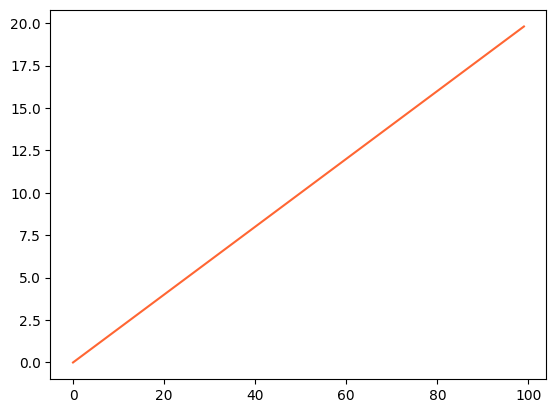

In [8]:
plt.plot(true_x, label="Истинное значение x", color="#FF6633")